# K Means Cluster
K-Means Clustering is an unsupervised learning grouping the unlabeled dataset into different clusters. The goal of clustering is dividing the population or set of data points into a number of groups in order that the data points within each group contains mutual similar features. The number of groups depends on the decision of value of K.

### 1. K-means algorithm
K-Means algorithm compares the euclidean distance of the points to each  centroid and then groups them to the cluster whose centroid is nearest to the points. The points in same cluster have something similar according to the feature input.

### 2. K-means algorithm workflow

1. Randomly initialize k points. Those points are means or cluster centroids.
2. Categorize the data points to the nearest cluster by calculating the euclidean distance between data point and centroid. 
3. Recompute the centroid by calculating the means of all points within that cluster.
4. Repeat step 2 and 3 until the centroid remains the same. 

### 3. K-means optimization
Goal: Minimize $J(c^{(1)},...,c^{(m)}, \mu_1,...,\mu_k)$

#### cost function

$$J(c^{(1)},...,c^{(m)}, \mu_1,...,\mu_k) = \frac{1}{m}\sum_{i=1}^m||x^{(i)} - \mu_{c^{(i)}}||^2$$


$c^{(i)}=$ index of cluster to which example $x^{(i)}$ is currenly assigned <br>
$\mu_k=$ cluster centroid $k$ <br>
$\mu_{c^{(i)}}=$ cluster centroid to which example $x^{(i)}$ has been assigned

#### cost function translation
Repeat{<br>
&nbsp;&nbsp;for $i=1$ to $m:$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;$c^{(i)}=$ index of nearest cluster centroid of $x^{(i)}$ ---- minimize $x^{(i)}-\mu_{c^{(i)}}$<br>
    &nbsp;&nbsp;for $k=1$ to $K:$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\mu_k=$ avg of points in cluster $k$ ---- minimize $\mu_{c^{(i)}}$ <br> 
}

### 4. Implement K-Means from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
# displaying purpose
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %(i+1))

#### Find closest centroid
$c^{(i)}: k$ that when $|| x^{(i)} - \mu_{k^j} ||^2$ is minimal


In [3]:
def assign_centroid(X,cen):
    '''
    Find the closest centroid for the data points

    Args:
        X(ndarray): (m,n) - m examples with n feautures
        cen(ndarray): k centroids
    Returns:
        idx: (m,) - closest centroids of each example 
    '''
    K = cen.shape[0]
    m = X.shape[0]
    idx = np.zeros(X.shape[0],dtype=int)
    
    # calculate all the euclidean distance between point i and centroid k
    for i in range(0,m):
        distance = []
        for k in range(0,K):
            d_ik = np.linalg.norm(X[i]-cen[k])
            distance.append(d_ik)
        idx[i] = np.argmin(distance)
    
    return idx

In [6]:
X = np.load("ex7_X.npy")
cen = np.array([[3,3], [6,2], [8,5]])
idx = assign_centroid(X,cen)
idx

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0])

#### Recompute centroid means
Centroid is the average of all points in the cluster:
$$
\mu_k = \frac{1}{|C_k|}\sum_{i\in{C_k}}{x^{(i)}}
$$

Where<br>
- $C_k$ is the set of examples that are assigned to centroid $k$<br>
- $|C_k|$ is the number of examples in the set $C_k$

In [5]:
def new_centroid(X,idx,K):
    '''
    Recompute centroids by computing the averages of the 
    data points assigned to each cluster.

    Args:
        X(ndarray): (m, n) - m examples with n feautures
        idx(ndarray): (m, ) Array containing index of closest centroid for each 
                      example in X. Concretely, idx[i] contains the index of 
                      the centroid closest to example i
        K(int): number of centroids
    Returns:
        cen(ndarray): (K, n) New centroids computed
    '''

    n = X.shape[1]
    cen = np.zeros((K,n))

    for k in range(K):
        cen[k] = np.mean(X[idx==k],axis=0)
    
    return cen

In [7]:
new_cen = new_centroid(X,idx,3)
new_cen

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

#### Run K-means algorithm

In [18]:
def run_kmeans(X,cen0,max_iter,plot_it):
    m = X.shape[0]
    K = cen0.shape[0]
    idx = np.zeros(m)

    cen = cen0
    pre_cen = cen

    for t in range(max_iter):
        print("iteration %d/%d" %(t+1, max_iter))
        
        idx = assign_centroid(X,cen)
        
        if plot_it:
            plot_progress_kMeans(X, cen, pre_cen, idx, K, t)
            pre_cen = cen
        
        cen = new_centroid(X,idx,K)
        plt.show()

    return cen,idx

iteration 1/10


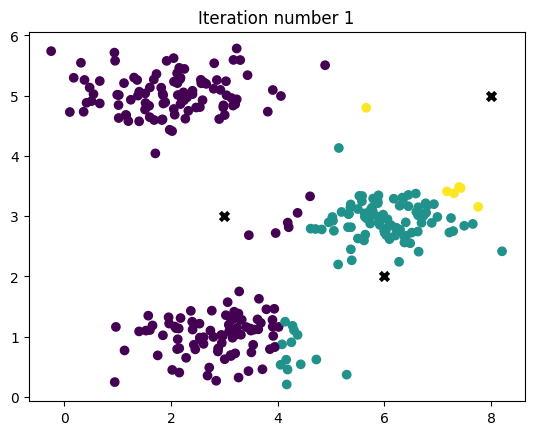

iteration 2/10


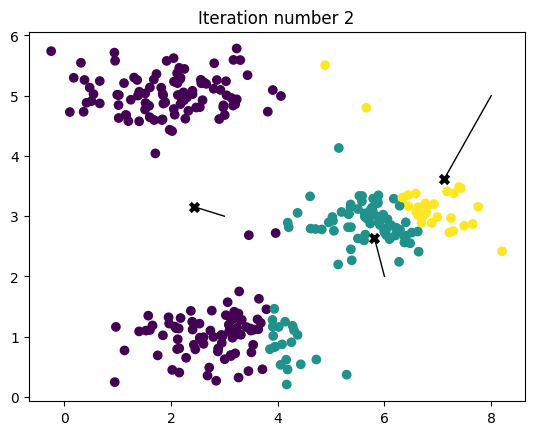

iteration 3/10


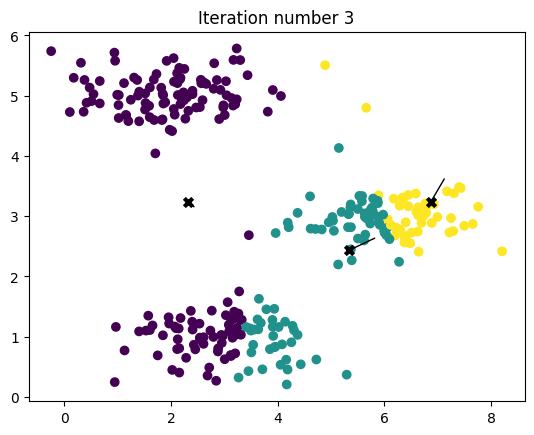

iteration 4/10


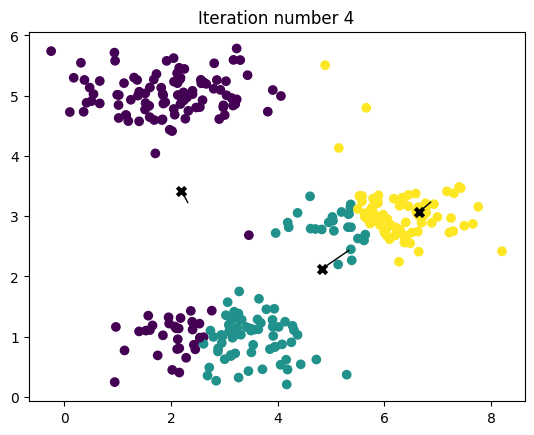

iteration 5/10


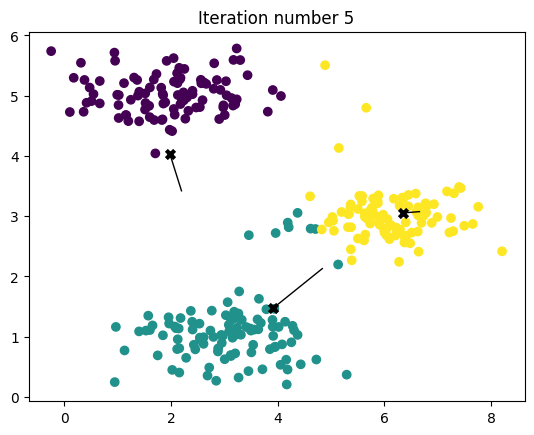

iteration 6/10


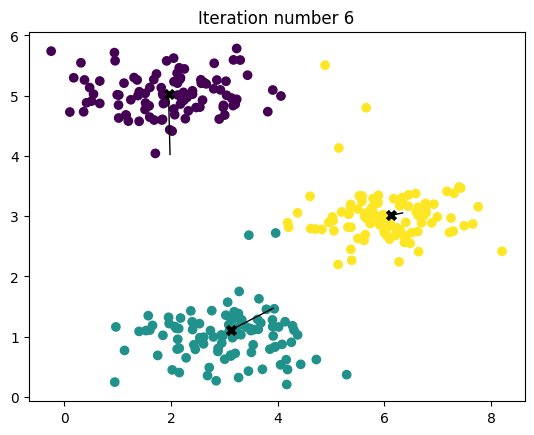

iteration 7/10


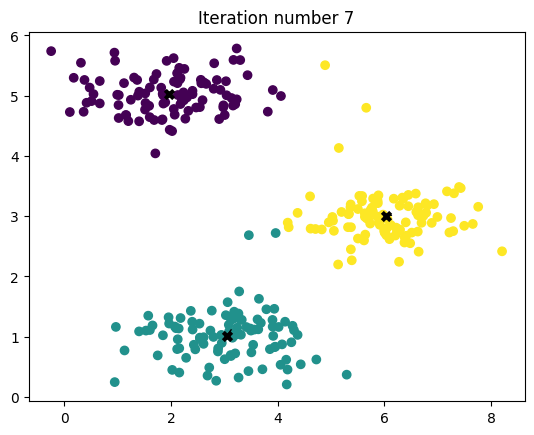

iteration 8/10


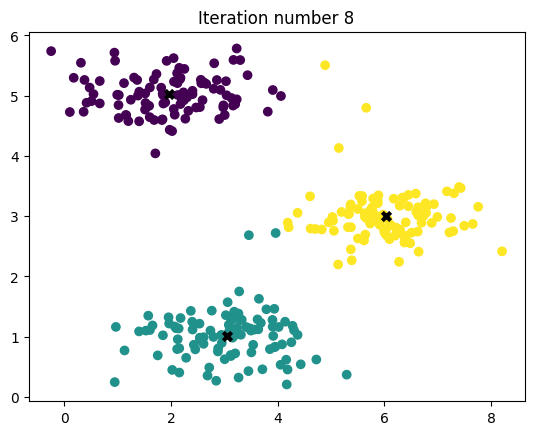

iteration 9/10


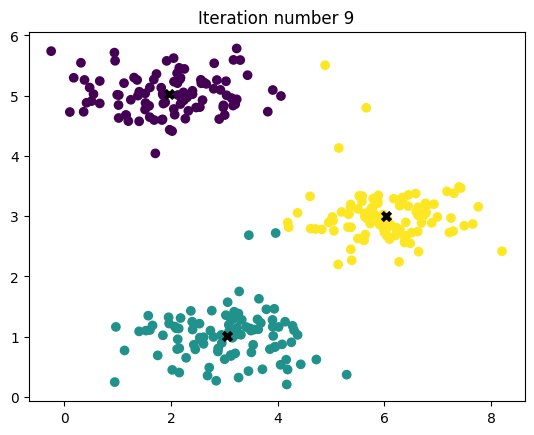

iteration 10/10


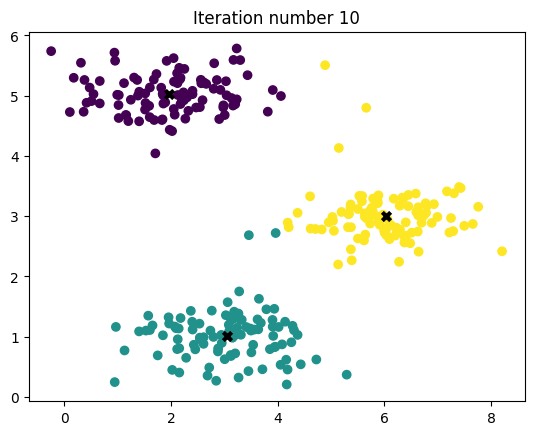

In [20]:
cen10,idx10 = run_kmeans(X,cen,10,True)